In [1]:
import torch 
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo pre-entrenado

In [2]:
inception = models.inception_v3(pretrained = True)    #Modelo inception de visión por computadora, indicamos que el modelo esta pre-entrenado.

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


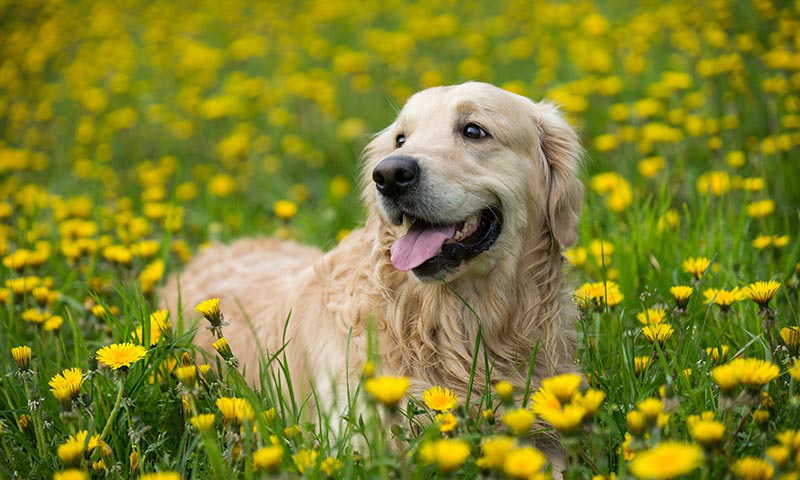

In [21]:
url = "https://mx.hola.com/imagenes/estar-bien/20180518124233/los-cuidados-del-gloden-retriever/0-567-631/goldenretriever-t.jpg" #url de la imágen
image = request.urlretrieve(url, "test.jpg")       #Guardamos la imágen en el sistema de archivos.
img = Image.open(image[0])                         #Abrimos el path de la imágen donde se quedó guardado.
img                                                #Mostramos la imágen.

In [22]:
preprocess = transforms.Compose([                   #Tranformación de la imágen.
    transforms.Resize(128),                         #Cambio del tamaño.
    transforms.CenterCrop(120),                     #Alineación de la imágen al centro.
    transforms.ToTensor(),                          #Representamos la imágen en números.
    transforms.Normalize(                           #Normalización de la imágen.
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.0224, 0.225]
    )                             
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


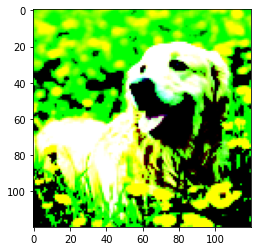

In [23]:
img_t = preprocess(img)                             #Usamos la imágen transformada.                        
batch = torch.unsqueeze(img_t, 0)                   #Agregamos una dimensión extra.
plt.imshow(img_t.permute(1,2,0))                    #Mostramos la imágen transformada.

In [24]:
inception.eval()          #Nos muestra los detalles de la red inception.

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [25]:
out = inception(batch)      #Usamos inception con nuestra imagen transformada.
out                         #Mostramos la salida (La entrada y la salida son tensores).

tensor([[-6.0786e+00, -5.4828e+00,  4.0616e+00, -6.2293e+00, -1.4544e+01,
         -5.1500e+00,  7.1565e-02,  1.1838e+01,  1.0515e+01, -5.1614e+00,
         -3.7570e+00, -4.1075e+00,  3.3060e+00, -5.2663e+00, -2.2606e+00,
         -2.9709e-01, -2.4813e+00, -3.1621e+00, -5.7907e+00, -1.3212e+00,
         -6.2251e+00,  3.0634e+00,  8.0283e+00,  7.1090e+00,  4.3235e+00,
         -4.0667e+00, -4.0121e+00, -3.6187e+00, -5.8550e+00, -1.4993e-01,
         -1.6275e+00, -2.5846e+00, -2.2371e-01, -5.0268e-01, -7.7357e-01,
         -3.6187e+00,  4.5653e-01,  1.6199e+00,  2.3505e+00, -1.0250e+00,
         -8.9412e-01, -1.8400e+00, -3.6871e+00,  5.9775e+00, -5.2163e+00,
         -4.1336e+00, -5.0534e+00, -7.4838e-01, -2.4222e+00, -1.5009e+00,
          5.8503e+00,  8.1194e-01, -6.5051e+00, -1.0244e+01, -6.8160e+00,
         -5.5377e+00, -1.0908e+01, -2.8397e+00, -2.1553e+00, -5.9914e+00,
         -6.9613e+00,  7.7193e-01,  1.7179e+00, -4.1275e+00, -5.9528e+00,
         -1.3504e+00, -5.7447e+00,  6.

In [26]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]             #Trae a un gist todas las etiquetas de inception y las agrega a una variable.

In [27]:
out                 #Mostramos el resultado.

tensor([[-6.0786e+00, -5.4828e+00,  4.0616e+00, -6.2293e+00, -1.4544e+01,
         -5.1500e+00,  7.1565e-02,  1.1838e+01,  1.0515e+01, -5.1614e+00,
         -3.7570e+00, -4.1075e+00,  3.3060e+00, -5.2663e+00, -2.2606e+00,
         -2.9709e-01, -2.4813e+00, -3.1621e+00, -5.7907e+00, -1.3212e+00,
         -6.2251e+00,  3.0634e+00,  8.0283e+00,  7.1090e+00,  4.3235e+00,
         -4.0667e+00, -4.0121e+00, -3.6187e+00, -5.8550e+00, -1.4993e-01,
         -1.6275e+00, -2.5846e+00, -2.2371e-01, -5.0268e-01, -7.7357e-01,
         -3.6187e+00,  4.5653e-01,  1.6199e+00,  2.3505e+00, -1.0250e+00,
         -8.9412e-01, -1.8400e+00, -3.6871e+00,  5.9775e+00, -5.2163e+00,
         -4.1336e+00, -5.0534e+00, -7.4838e-01, -2.4222e+00, -1.5009e+00,
          5.8503e+00,  8.1194e-01, -6.5051e+00, -1.0244e+01, -6.8160e+00,
         -5.5377e+00, -1.0908e+01, -2.8397e+00, -2.1553e+00, -5.9914e+00,
         -6.9613e+00,  7.7193e-01,  1.7179e+00, -4.1275e+00, -5.9528e+00,
         -1.3504e+00, -5.7447e+00,  6.

In [28]:
_, index = torch.max(out, 1)         #Le damos sentido al out usando la función max.

In [29]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100            #Porcentaje de la similitud de la imagén con lo que la red reconoce.
labels[index[0]], percentage[index[0]].item()

('Great Pyrenees', 99.99818420410156)

In [30]:
#Mostramos más opciones de reconocimiento de la red y su respectivo porcentaje.
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Great Pyrenees 99.99818420410156
clumber, clumber spaniel 0.0018139088060706854
golden retriever 8.42730969452532e-07
Afghan hound, Afghan 2.7487502052281343e-08
kuvasz 1.8714890748228186e-10


# Trabajando con un dataset 

In [31]:
data_path = 'data/'                                                         #Conjunto de datos desde Pytorch.
dataset = datasets.CIFAR10(data_path, train=True, download=True)            #Asignamos a dataset el conjunto de datos.
validation_set = datasets.CIFAR10(data_path, train=False, download=True)    #Set de validacion

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [33]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']     #Clases del dataset.
len(dataset)                                                                          #Tamaño del dataset (Número de imágenes).

50000

In [34]:
img, label = dataset[150]               #Llamamos a la imágen X.
img, label, classes[label]              #Mostramos la imágen, el label y el nombre de la clase.

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3263B95B38>, 3, 'cat')

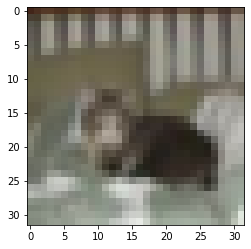

In [ ]:
plt.imshow(img)                   #Mostramos la imágen de 32 x 32 pixeles.

In [35]:
tensor_transform = transforms.ToTensor()             #Convertimos la imágen a tensor.
img_tensor = tensor_transform(img)                   #Creamos la imágen nueva.
img, img_tensor, img_tensor.shape                    #Mostramos la imágen, el tensor y la forma del tensor.

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3263B95B38>,
 tensor([[[0.2588, 0.2941, 0.3294,  ..., 0.2706, 0.4078, 0.4000],
          [0.2824, 0.2745, 0.4549,  ..., 0.3373, 0.6000, 0.5804],
          [0.3373, 0.3098, 0.5686,  ..., 0.3333, 0.6118, 0.5922],
          ...,
          [0.4824, 0.4863, 0.5098,  ..., 0.5647, 0.5922, 0.7294],
          [0.5255, 0.5294, 0.5490,  ..., 0.5647, 0.6627, 0.8784],
          [0.5098, 0.5176, 0.5373,  ..., 0.5843, 0.7294, 0.8745]],
 
         [[0.1451, 0.1843, 0.2196,  ..., 0.2000, 0.3412, 0.3373],
          [0.2431, 0.2392, 0.4196,  ..., 0.2863, 0.5529, 0.5373],
          [0.3333, 0.3020, 0.5647,  ..., 0.3020, 0.5882, 0.5725],
          ...,
          [0.5137, 0.5176, 0.5412,  ..., 0.6000, 0.6353, 0.7725],
          [0.5569, 0.5608, 0.5804,  ..., 0.5961, 0.6980, 0.9098],
          [0.5412, 0.5451, 0.5686,  ..., 0.6118, 0.7569, 0.8941]],
 
         [[0.0980, 0.1255, 0.1529,  ..., 0.1686, 0.2863, 0.2824],
          [0.1961, 0.1804, 0.3529,  ..., 0

In [36]:
#El dataset ahora esta representado como tensores.
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [37]:
#Llamamos a un dato del dataset pero ahora se muestra como tensor.
img, label = dataset[150]
img

tensor([[[0.2588, 0.2941, 0.3294,  ..., 0.2706, 0.4078, 0.4000],
         [0.2824, 0.2745, 0.4549,  ..., 0.3373, 0.6000, 0.5804],
         [0.3373, 0.3098, 0.5686,  ..., 0.3333, 0.6118, 0.5922],
         ...,
         [0.4824, 0.4863, 0.5098,  ..., 0.5647, 0.5922, 0.7294],
         [0.5255, 0.5294, 0.5490,  ..., 0.5647, 0.6627, 0.8784],
         [0.5098, 0.5176, 0.5373,  ..., 0.5843, 0.7294, 0.8745]],

        [[0.1451, 0.1843, 0.2196,  ..., 0.2000, 0.3412, 0.3373],
         [0.2431, 0.2392, 0.4196,  ..., 0.2863, 0.5529, 0.5373],
         [0.3333, 0.3020, 0.5647,  ..., 0.3020, 0.5882, 0.5725],
         ...,
         [0.5137, 0.5176, 0.5412,  ..., 0.6000, 0.6353, 0.7725],
         [0.5569, 0.5608, 0.5804,  ..., 0.5961, 0.6980, 0.9098],
         [0.5412, 0.5451, 0.5686,  ..., 0.6118, 0.7569, 0.8941]],

        [[0.0980, 0.1255, 0.1529,  ..., 0.1686, 0.2863, 0.2824],
         [0.1961, 0.1804, 0.3529,  ..., 0.2667, 0.5098, 0.4902],
         [0.2941, 0.2588, 0.5098,  ..., 0.2902, 0.5529, 0.

In [38]:
#Mostramos el valor mínimo y máximo del tensor.
img.min(), img.max()

(tensor(0.0745), tensor(0.9176))

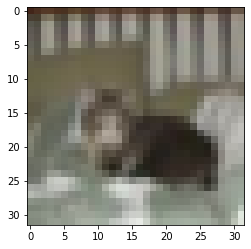

In [39]:
#Mostramos la imágen usando ahora la representación en tensores.
plt.imshow(img.permute(1, 2, 0))

In [40]:
#Convertimos todas las imágenes del dataset a tensores.
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [41]:
#Mostramos la forma de las imágenes.
imgs.shape

torch.Size([3, 32, 32, 50000])

In [42]:
#Calculamos la media.
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [43]:
#Calculamos la desviación estandar.
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [45]:
#Hacemos la transformación.
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])

In [46]:
#Treamos al dataset.
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

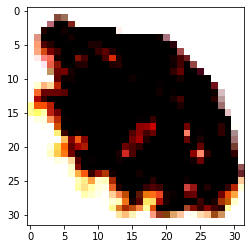

In [47]:
#Hacemos una pruba con una nueva imágen.
img_transformed,label = dataset[125]
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]